In [2]:
import scipy
from scipy.io.wavfile import read
from scipy.signal import hann
from scipy.fftpack import rfft
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
import librosa.display
file_path = '/Users/mcassettix/Music/'
file_name = '01 - Everyday.mp3'
file = file_path + file_name
y, sr = librosa.load(file)

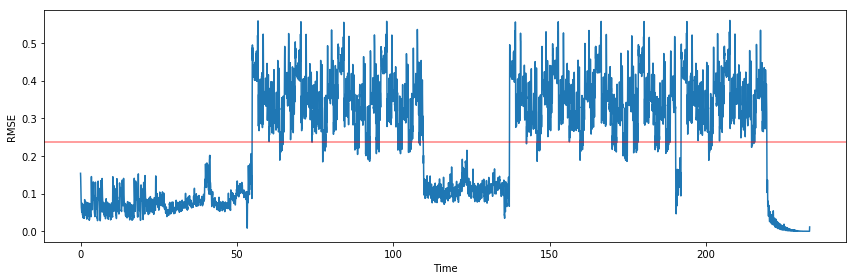

In [3]:
rmse = librosa.feature.rmse(y=y)[0]
times = librosa.frames_to_time(np.arange(len(rmse)))
plt.figure(figsize=(12, 4))
plt.plot(times, rmse)
plt.axhline(np.mean(rmse), color='r', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.axis('tight')
plt.tight_layout()

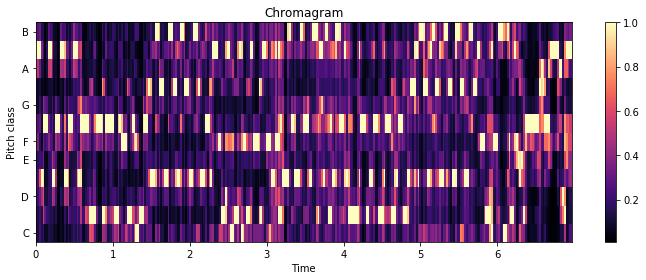

In [4]:
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma[:,600:900], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [5]:
### This song has alot of arpeggios, ideally I would like to use this as a feature
### As I like songs with arpeggios

In [6]:
### This is the separating out vocal components using a filter

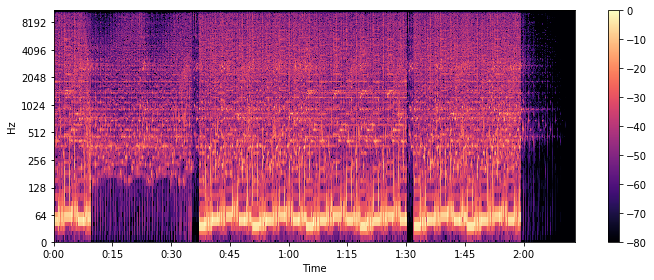

In [7]:
S_full, phase = librosa.magphase(librosa.stft(y))
idx = slice(*librosa.time_to_frames([100, 450], sr=sr))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [8]:
### Visualize where the energy in each octave, can use this to determine 
### where the bass heavy sections are, since I like bass heavy music

/Users/mcassettix/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:959: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


Text(0.5,1,'Constant-Q power spectrogram (note)')

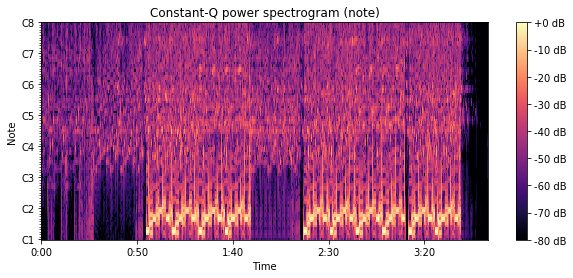

In [9]:
CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(CQT, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

In [ ]:
#mnist (decision tree, etc) -- 10,000 digits, ~1000/each class

In [ ]:
## Feature Engineering wish list: 
## Idenitifying bass heavy regions, idenitifying arpeggios, etc